## HSSP Spring 2024: Computing in the Small: Lyman Hurd, Glenn Hurd

### Week 2: Review of Collatz Conjecture.

Last week we ended by looking at the "Collatz" function which takes an integer `n` and applies the rules:

   * **Rule 1**: if _n_ is even, return _n/2_
   * **Rule 2**: if _n_ is odd, return _3n + 1_

In [9]:
def collatz(n):
    if n % 2 == 0:
        return n // 2      # Rule 1
    else:
        return 3 * n + 1   # Rule 2

    
def collatz_iterates(n, iters=10):
    for i in range(iters):
        print(n, "-> ", end="")
        n = collatz(n)
    print(n)

The homework was to make out what happens to negative numbers and zero.  Zero is even and so it simply stays fixed:

0 --> 0 --> 0 --> 0...

Looking at a range of negative values:

In [10]:
for i in range(-1, -10, -1):
    collatz_iterates(i)

-1 -> -2 -> -1 -> -2 -> -1 -> -2 -> -1 -> -2 -> -1 -> -2 -> -1
-2 -> -1 -> -2 -> -1 -> -2 -> -1 -> -2 -> -1 -> -2 -> -1 -> -2
-3 -> -8 -> -4 -> -2 -> -1 -> -2 -> -1 -> -2 -> -1 -> -2 -> -1
-4 -> -2 -> -1 -> -2 -> -1 -> -2 -> -1 -> -2 -> -1 -> -2 -> -1
-5 -> -14 -> -7 -> -20 -> -10 -> -5 -> -14 -> -7 -> -20 -> -10 -> -5
-6 -> -3 -> -8 -> -4 -> -2 -> -1 -> -2 -> -1 -> -2 -> -1 -> -2
-7 -> -20 -> -10 -> -5 -> -14 -> -7 -> -20 -> -10 -> -5 -> -14 -> -7
-8 -> -4 -> -2 -> -1 -> -2 -> -1 -> -2 -> -1 -> -2 -> -1 -> -2
-9 -> -26 -> -13 -> -38 -> -19 -> -56 -> -28 -> -14 -> -7 -> -20 -> -10


How many loops do you observe?  The problem with this sort of computation is that one can never be certain (absent proof) that one has looked far enough, and in this case we appear to have missed a loop.

In [12]:
collatz_iterates(-17, 18)

-17 -> -50 -> -25 -> -74 -> -37 -> -110 -> -55 -> -164 -> -82 -> -41 -> -122 -> -61 -> -182 -> -91 -> -272 -> -136 -> -68 -> -34 -> -17


#### Stopping Time
Returning our attention to positive numbers, we can define the "stopping time" to be the number of times we have to apply our rule before we get to 1 (for positive starting numbers).  We technically can define the stopping time to be -1 if it never gets to 1, but the Collatz Conjecture states that this never happens, a fact that has been verified past 5 quintillion!

#### while Loops
Anoher new piece of python.  The `for` loop iterated over a fixed number of times.  The `while` loop loops until some condition is met.  This willl be the first case in which we have written a program for which we do not know if it will ever return an answer.  Returning is also known as "halting" and will form a recurring theme.

In [4]:
def stopping_time(n):
    count = 0
    while n != 1:
        n = collatz(n)
        count += 1
    return count


In [5]:
for i in range(1, 11):
    print(f"stopping_time({i}) = {stopping_time(i)}")

stopping_time(1) = 0
stopping_time(2) = 1
stopping_time(3) = 7
stopping_time(4) = 2
stopping_time(5) = 5
stopping_time(6) = 8
stopping_time(7) = 16
stopping_time(8) = 3
stopping_time(9) = 19
stopping_time(10) = 6


It is hard to see a pattern here, but let us add our graphing package so we can visualize many more points at once.

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

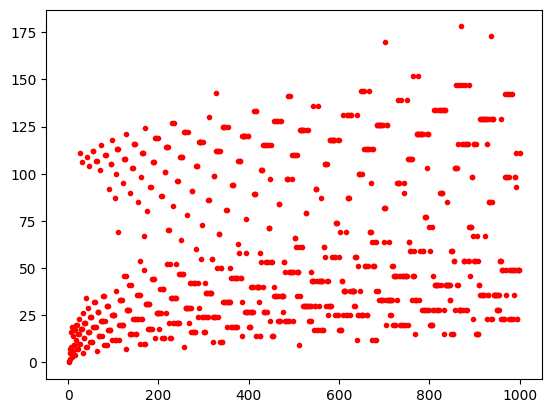

In [7]:
N = 1001
times = []
for i in range(1, N):
    times.append(stopping_time(i))

plt.plot(range(1, N), times, "r.")

The Collatz problem has remained unsolved for over a half century and has had hundreds of articles written about it as well as books.  As explained in XKCD comic https://xkcd.com/710/.

#### Another way to look at it
The current formulation of the Collatz problem has the property that every time we apply Rule 2 (`3n + 1`), the next step is always Rule 2 (`n//2`) because Rule 2 always takes an odd integer to an even one. Because of this, we sometimes combine the two to form a new Rule 2' `n --> (3n + 1)//2`.  Some example iterations are given below. 

In [14]:
def collatz_modified(n):
    if n % 2 == 0:
        return n // 2      # Rule 1
    else:
        return (3 * n + 1)//2   # Rule 2'

    
def collatz_iterates_modified(n, iters=10):
    for i in range(iters):
        print(n, "-> ", end="")
        n = collatz_modified(n)
    print(n)

for i in range(1, 21):
    collatz_iterates_modified(i)

1 -> 2 -> 1 -> 2 -> 1 -> 2 -> 1 -> 2 -> 1 -> 2 -> 1
2 -> 1 -> 2 -> 1 -> 2 -> 1 -> 2 -> 1 -> 2 -> 1 -> 2
3 -> 5 -> 8 -> 4 -> 2 -> 1 -> 2 -> 1 -> 2 -> 1 -> 2
4 -> 2 -> 1 -> 2 -> 1 -> 2 -> 1 -> 2 -> 1 -> 2 -> 1
5 -> 8 -> 4 -> 2 -> 1 -> 2 -> 1 -> 2 -> 1 -> 2 -> 1
6 -> 3 -> 5 -> 8 -> 4 -> 2 -> 1 -> 2 -> 1 -> 2 -> 1
7 -> 11 -> 17 -> 26 -> 13 -> 20 -> 10 -> 5 -> 8 -> 4 -> 2
8 -> 4 -> 2 -> 1 -> 2 -> 1 -> 2 -> 1 -> 2 -> 1 -> 2
9 -> 14 -> 7 -> 11 -> 17 -> 26 -> 13 -> 20 -> 10 -> 5 -> 8
10 -> 5 -> 8 -> 4 -> 2 -> 1 -> 2 -> 1 -> 2 -> 1 -> 2
11 -> 17 -> 26 -> 13 -> 20 -> 10 -> 5 -> 8 -> 4 -> 2 -> 1
12 -> 6 -> 3 -> 5 -> 8 -> 4 -> 2 -> 1 -> 2 -> 1 -> 2
13 -> 20 -> 10 -> 5 -> 8 -> 4 -> 2 -> 1 -> 2 -> 1 -> 2
14 -> 7 -> 11 -> 17 -> 26 -> 13 -> 20 -> 10 -> 5 -> 8 -> 4
15 -> 23 -> 35 -> 53 -> 80 -> 40 -> 20 -> 10 -> 5 -> 8 -> 4
16 -> 8 -> 4 -> 2 -> 1 -> 2 -> 1 -> 2 -> 1 -> 2 -> 1
17 -> 26 -> 13 -> 20 -> 10 -> 5 -> 8 -> 4 -> 2 -> 1 -> 2
18 -> 9 -> 14 -> 7 -> 11 -> 17 -> 26 -> 13 -> 20 -> 10 -> 5
19 -> 29 ->

We mention this because this sequence will rear its head in a later unit!